In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gofish import imagecube
from matplotlib.patches import Ellipse
from matplotlib.colors import PowerNorm
from matplotlib.ticker import MultipleLocator

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 1.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.0})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.0})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.0})
plt.rcParams.update({'ytick.minor.width': 1.0})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
def extent(xaxis,yaxis,dpix):
    """Cube field of view for use with Matplotlib's ``imshow``."""
    return [xaxis[0]+dpix/2.0, xaxis[-1]-dpix/2.0, yaxis[0]-dpix/2.0, yaxis[-1]+dpix/2.0]
    
def plot_beam(axs, bmin, bmaj, bpa, x0=0.1, y0=0.1, color='w'):
    """Plot the sythensized beam on the provided axes."""
    beam = Ellipse(
        axs.transLimits.inverted().transform((x0, y0)),
        width=bmin, height=bmaj, angle=-bpa,
        color=color, fill=False, hatch='/////', lw=2
    )
    axs.add_patch(beam)

In [5]:
PA  = 11.28 #PA  from Cathie's paper
inc = 49.24 #inc from Cathie's paper

<IPython.core.display.Javascript object>


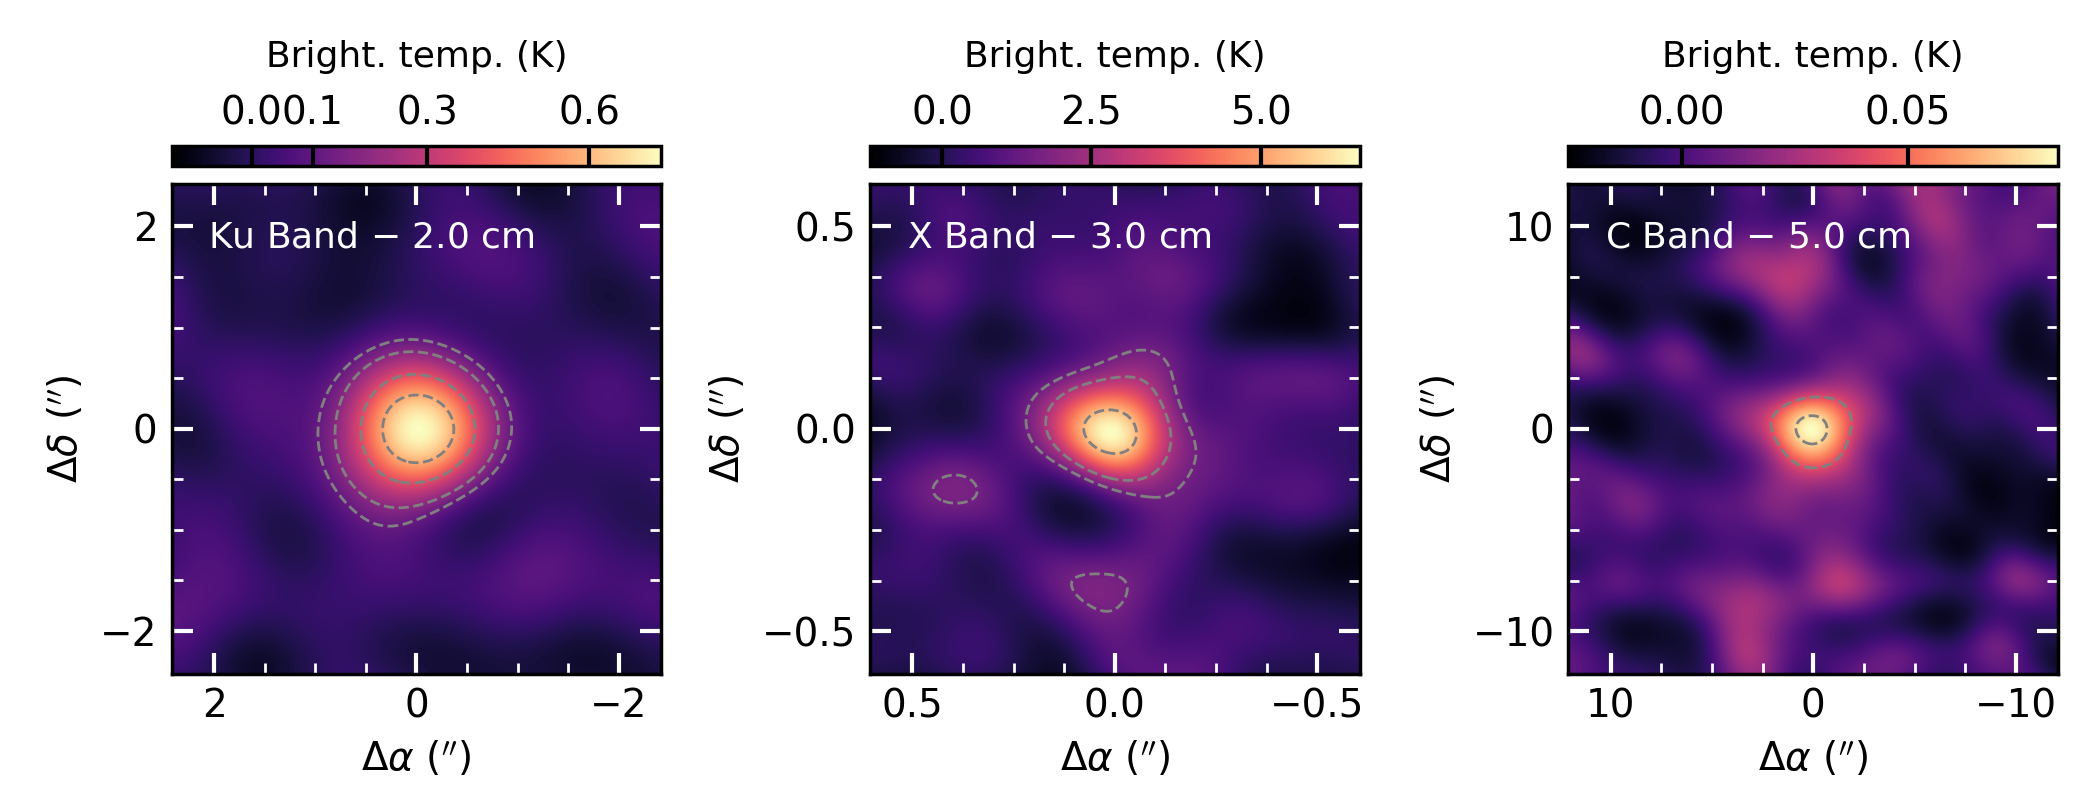

In [6]:
fig, axs = plt.subplots(1,3,figsize=(10.5,4.))

lbl    = [r'Ku Band $-$ 2.0 cm',r'X Band $-$ 3.0 cm',r'C Band $-$ 5.0 cm']

fov    = [4.75,1.1875,24.05]

pov    = [0.9 ,1.2   , 1.4 ]

val    = [1.7 ,0.35  , 9.0 ]

ml     = [0.5 ,0.1   , 2.5 ]

ticks  = [[0.0,0.1,0.3,0.6], [0.,2.5,5.], [0.00,0.05]]
     
levels = [
    np.array([3,5,10,15])*6.88e-06,np.array([3,5,10])*2.64e-06,np.array([3,5])*6.60e-06
]

rms = [6.88e-06,2.64e-06,6.60e-06]

pixels = [0.04, 0.008, 0.05]

for idx, filename in enumerate([
    'CITau_VLA_Ku_selfcal_ave_1ch_30s_default_uniform.image.tt0.fits',
    'CITau_VLA_X_preselfcal_ave_1ch_30s_default_natural.image.tt0.fits',
    'CITau_VLA_C_selfcal_ave_30s_default_natural.image.tt0.fits',
]):
    cube = imagecube(filename, FOV=fov[idx], pixel_scale=pixels[idx])

    data = cube.data
    data = cube.jybeam_to_Tb_RJ(data)
    cmap = plt.cm.get_cmap('magma').copy()
    # cmap.set_under(color='k')
    # where_are_NaNs = np.isnan(data)
    # data[where_are_NaNs] = 0
    
    norm = PowerNorm(pov[idx], vmin=-cube.jybeam_to_Tb_RJ(3.*rms[idx]), vmax=np.amax(data))

    #p = axs[idx].pcolormesh(-cube.xaxis, cube.yaxis, data, cmap=cmap, norm=norm)
    p = axs[idx].imshow(
        data, cmap=cmap, norm=norm, origin='lower', interpolation='bicubic', 
        extent=extent(xaxis=cube.xaxis,yaxis=cube.yaxis,dpix=np.diff(cube.yaxis).mean())
    )
    axs[idx].contour(cube.xaxis, cube.yaxis, data, norm=norm, levels=cube.jybeam_to_Tb_RJ(levels[idx]), colors='gray', linestyles='--', linewidths=1.)
    p.set_rasterized(True)
    axs[idx].xaxis.set_tick_params(color='white', which='both') 
    axs[idx].yaxis.set_tick_params(color='white', which='both') 
    
    #el = Ellipse(xy=(-val[idx],-val[idx]), width=cube.bmin, height=cube.bmaj, angle=cube.bpa, color='white', fill=False, hatch='/////', lw=2)
    #axs[idx].add_patch(el)
    ##plot_beam(axs=axs[idx], bmin=cube.bmin, bmaj=cube.bmaj, bpa=cube.bpa, x0=0.075, y0=0.075, color='w')
    
    bar = fig.colorbar(
        plt.cm.ScalarMappable(norm=norm, cmap=cmap), 
        ax = axs[idx], ticks=ticks[idx],
        orientation = 'horizontal', location = 'top',
        aspect = 25, pad = 0.03,
    )
    bar.ax.yaxis.set_tick_params(color='k', which='both') 
    bar.ax.xaxis.set_tick_params(color='k', which='both')
    bar.set_label(r'Bright. temp. (K)', labelpad=10, fontsize=13)#$T_{\rm b}$ 
    bar.solids.set_rasterized(True)
    
    axs[idx].text(
        0.075, 0.925, r'{}'.format(lbl[idx]),   
        ha = 'left', va = 'top', transform = axs[idx].transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'white', fontsize = 13,
    )
    
    #axs[idx].xaxis.set_minor_locator(MultipleLocator(ml[idx]))
    #axs[idx].yaxis.set_minor_locator(MultipleLocator(ml[idx]))
    #axs[idx].tick_params(which='minor', color='w', length=4., width=0.75)
    
    axs[idx].set_xlabel(r"$\Delta\alpha\ ('')$")
    axs[idx].set_ylabel(r"$\Delta\delta\ ('')$")

axs[0].set_xticks([2,0.,-2])
axs[0].set_yticks([-2,0.,2])
axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.5))

axs[1].set_xticks([0.5,0.,-0.5])
axs[1].set_yticks([-0.5,0.,0.5])
axs[1].xaxis.set_minor_locator(MultipleLocator(0.125))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.125))

axs[2].set_xticks([10,0.,-10])
axs[2].set_yticks([-10,0.,10])
axs[2].xaxis.set_minor_locator(MultipleLocator(2.5))
axs[2].yaxis.set_minor_locator(MultipleLocator(2.5))

fig.tight_layout()
plt.savefig('maps_bandKu_X_C_preselfcal.pdf',bbox_inches='tight')